In [256]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path_data = os.path.join(".", "ML_Lab08_Dataset.csv")

import builtins

def print(*args, **kwargs):
    kwargs['sep'] = ''
    return builtins.print(*args, **kwargs)
    
plt.rcParams['figure.figsize'] = (6, 4)
# Change to stix
plt.rcParams['font.family'] = 'STIXGeneral'

### Lab Task 1

In [257]:
"""
You have been provided with a dataset containing several feature columns. You will need to select any 3 of the feature columns to make your own dataset. The “y” is the label column that your model will predict. The dataset examples are to be divided into 2 separate portions: training and test datasets (choose from 80-20 to 70-30 ratios). Save the prepared datasets as CSV files. Next, load the datasets into your python program and store them as NumPy arrays (Xtrain , ytrain, Xtest, ytest,). Next, use feature scaling to rescale the feature columns of both datasets so that their values range from 0 to 1. Finally, print both of the datasets (you need to show any 5 rows of the datasets).
"""

# Load the dataset into your python program as NumPy arrays (Xtrain ,ytrain).
dataset = pd.read_csv(path_data)
features = ["duration", "age", "job"]
label = "y"

X = dataset[features].values
y = dataset[label].values

def feature_scaling(X, axis=0):
    return (X - X.min(axis=axis)) / (X.max(axis=axis) - X.min(axis=axis))

# Split the dataset into training and test datasets
def random_split(X, y, ratio=0.8, scaling=feature_scaling):
    m = len(X)
    split = int(m * ratio)
    X_train, y_train = scaling(X[:split]), y[:split]
    X_test, y_test = scaling(X[split:]), y[split:]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = random_split(X, y)

print("X train:")
print(X_train[:5])
print("\nX test:")
print(X_test[:5])


X train:
[[0.18339768 0.20689655 0.36363636]
 [0.12355212 0.37931034 0.90909091]
 [0.18339768 1.         0.45454545]
 [0.02316602 0.62068966 0.18181818]
 [0.20849421 0.06896552 0.        ]]

X test:
[[0.09459459 0.20689655 0.        ]
 [0.5        0.86206897 0.        ]
 [1.         0.44827586 0.90909091]
 [0.05405405 0.62068966 0.09090909]
 [0.41505792 0.34482759 0.81818182]]


### Lab Task 2

In [258]:
"""
For logistic regression, you will implement the following hypothesis:

	h(x) = g(w0 + w1x1 + w2x2 + w3x3 + …)	
    g(z) = 1 / (1 + e-z)
    
The w represents the weights and the x represent the features. h(x) is to be calculated for each training example and its difference with the label y of that training example will represent the loss. The g(z) function represents the sigmoid activation function. In this task, you will write a function that takes in a value z as argument and outputs the result of the sigmoid activation g(z).
"""

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test the sigmoid function
print("Input:")
input_val = np.array([0, 1, 2, 3, 4, 5])
print(input_val)

print("\nSigmoid Test:")
print(sigmoid(input_val))

Input:
[0 1 2 3 4 5]

Sigmoid Test:
[0.5        0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]


### Lab Task 3

In [259]:
"""
In this task, you will write a cost function that calculates the overall loss across a set of training examples. This cost function will be useful to calculate the losses in both the training and test phases of the program.

cost_function(X, y)

The X and y are the features and labels of the training/test dataset. The function will return the cost value. The cost function is given in the manual.

The m is the number of the training/test examples in the dataset. Remember that the hypothesis requires the sigmoid activation. Write the code for the cost function and implement it to print out the cost. You will need to initialize the weights to some random values in order to calculate the hypothesis. Provide the code and all relevant screenshots showcasing the use of your cost function."""

def hypothesis(X, w):
    return sigmoid(np.dot(X, w))

def cost_function(X, y, w):
    m = len(X)
    h = hypothesis(X, w)
    return 1/m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))

# Initialize the weights to random values between 0 and 1.
w = np.random.rand(X_train.shape[1])

# Verify the cost function
print("Random weights [w]: ", w)
print("\nCost: ", cost_function(X_train, y_train, w))

Random weights [w]: [0.84673415 0.42940447 0.23772994]

Cost: 0.9808344138143561


### Lab Task 4

In [260]:
def gradient_descent(X, y, w, alpha):
    m = len(X)
    h = hypothesis(X, w)
    dw = (1 / m) * np.sum((h - y) @ X, axis=0)
    w -= alpha * dw
    return w

# Initialize the weights to random values between 0 and 1.
w = np.random.rand(X_train.shape[1])
alpha = 0.01

# Verify the gradient descent function
w = gradient_descent(X_train, y_train, w, alpha)
print("Gradient descent: ")
print("\nUpdated weights [w]: ", w)

Gradient descent: 

Updated weights [w]: [0.34947158 0.4242604  0.27453576]


### Lab Task 5

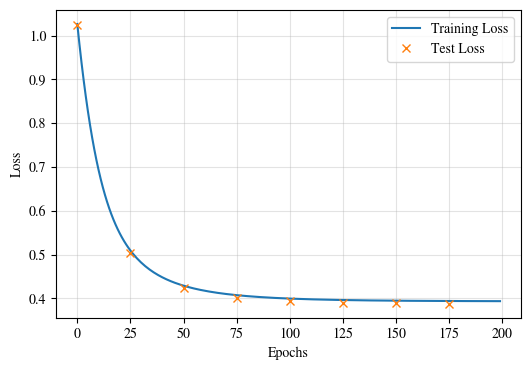

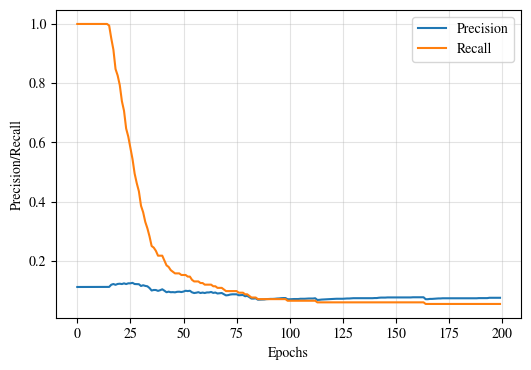

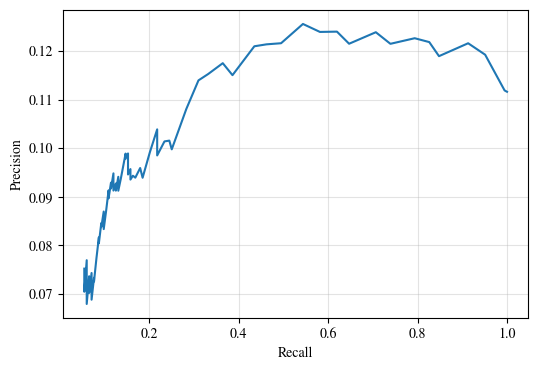

In [281]:
"""
In this task, you will use the functions from the previous two tasks to write a “main” function that performs the actual training and testing. Use the cost function and gradient descent function on the training examples to determine the training loss and update the weights. Then, use the cost function on the test examples to determine the test loss. This single iteration over the entire dataset (both training and test) marks completion of one epoch. You will need to perform the training and testing over several epochs (the epoch number is another hyperparameter that must be chosen). Ensure that at the end of each epoch, the training loss, test loss, precision value and recall value are stored for plotting purposes.

Start the training at some value of alpha. Try multiple training attempts with varying alpha values and find the best value of the alpha. Once you have found the best alpha value, showcase the output by making three plots:
1.	training loss and test loss vs. the epoch number
2.	precision and recall vs. the epoch number
3.	precision vs. recall

Ensure all axes are labeled appropriately. Provide the code (excluding function definitions) and all plots of the final output.
"""

def get_metrics(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return tp, fp, tn, fn

def main(X_train, y_train, X_test, y_test, alpha, epochs):
    w = np.random.rand(X_train.shape[1])
    train_loss = []
    test_loss = []
    precision_list = []
    recall_list = []

    for epoch in range(epochs):
        # Training phase
        w = gradient_descent(X_train, y_train, w, alpha)
        train_loss.append(cost_function(X_train, y_train, w))

        # Testing phase
        test_loss.append(cost_function(X_test, y_test, w))
        y_test_pred = hypothesis(X_test, w) >= 0.35
        y_test_pred = y_test_pred.astype(int)

        # Calculate precision and recall
        tp, fp, tn, fn = get_metrics(y_test, y_test_pred)
        precision_val = tp / (tp + fp) if tp + fp != 0 else 0
        recall_val = tp / (tp + fn) if tp + fn != 0 else 0

        precision_list.append(precision_val)
        recall_list.append(recall_val)

    return train_loss, test_loss, precision_list, recall_list, w


max_epochs = 200
alpha = 0.1
train_loss, test_loss, precision_list, recall_list, w = main(
    X_train, y_train, X_test, y_test, alpha, max_epochs
)

# Training and test loss vs. epoch number
plt.plot(train_loss, label="Training Loss")
plt.plot(test_loss, label="Test Loss", linestyle="", marker="x", markevery=25)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.35)
plt.show()

# Precision and recall vs. epoch number
plt.plot(precision_list, label="Precision")
plt.plot(recall_list, label="Recall")
plt.xlabel("Epochs")
plt.ylabel("Precision/Recall")
plt.legend()
plt.grid(alpha=0.35)
plt.show()

# Precision vs. recall
plt.plot(recall_list, precision_list)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(alpha=0.35)
plt.show()

### Lab Task 6

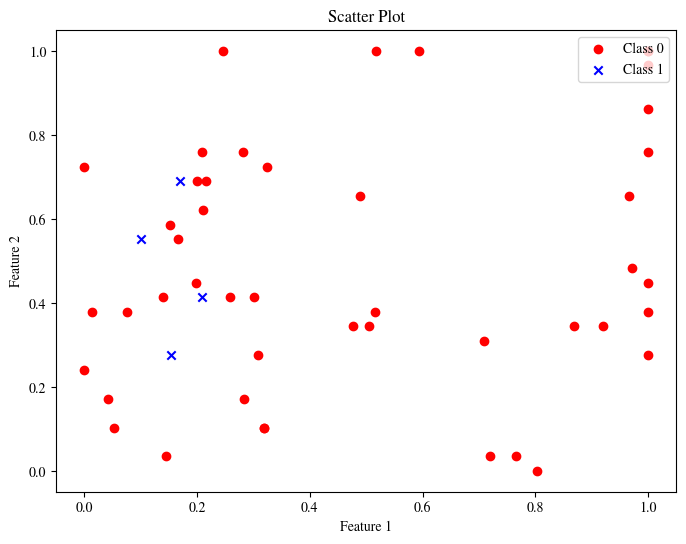

In [262]:
"""
Save the weights that fit the best model and use them to create a prediction function. The prediction function will take the features as input and output the predicted class of the label. Additionally, the prediction function must make a scatter plot showing the training and test examples. The coordinates in the scatter plot correspond to the inputs (x). The class is denoted by (red) O and (blue) X for 0 and 1 respectively. The predicted value must be shown as a black O or X. Provide the code and screenshot of is being used.
"""

# Save the weights that fit the best model
np.save("weights.npy", w)

# Load the weights and bias
w = np.load("weights.npy")

# Prediction function
def predict(X, w):
    return hypothesis(X, w) >= 0.5

# Use 30 samples for the scatter plot
indices = np.random.choice(len(X_test), 50)
X_scat = X_test[indices]
y_scat = y_test[indices]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.title("Scatter Plot")

# Plot examples
plt.scatter(
    X_scat[y_scat == 0][:, 0],
    X_scat[y_scat == 0][:, 1],
    color="red",
    marker="o",
    label="Class 0",
)
plt.scatter(
    X_scat[y_scat == 1][:, 0],
    X_scat[y_scat == 1][:, 1],
    color="blue",
    marker="x",
    label="Class 1",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper right")
plt.show()

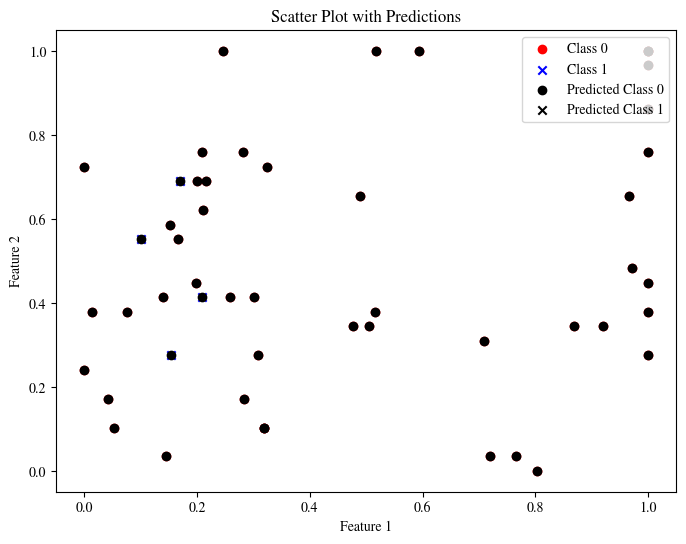

In [263]:
# The predicted value must be shown as a black O or X. Provide the code and screenshot of is being used.

# Make predictions using the best weights
y_pred = predict(X_scat, w)
y_pred_class = (y_pred).astype(int)

# Plot the predictions
plt.figure(figsize=(8, 6))
plt.title("Scatter Plot with Predictions")
plt.scatter(
    X_scat[y_scat == 0][:, 0],
    X_scat[y_scat == 0][:, 1],
    color="red",
    marker="o",
    label="Class 0",
)
plt.scatter(
    X_scat[y_scat == 1][:, 0],
    X_scat[y_scat == 1][:, 1],
    color="blue",
    marker="x",
    label="Class 1",
)
plt.scatter(
    X_scat[y_pred_class == 0][:, 0],
    X_scat[y_pred_class == 0][:, 1],
    color="black",
    marker="o",
    label="Predicted Class 0",
)
plt.scatter(
    X_scat[y_pred_class == 1][:, 0],
    X_scat[y_pred_class == 1][:, 1],
    color="black",
    marker="x",
    label="Predicted Class 1",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper right")
plt.show()